# Breast Cancer Project

This project is done under DSC 540 - Advanced Machine Learning
Instructor: Ilyas Ustun, PhD  
Location: Chicago, IL  

In [1]:
import sklearn
sklearn.__version__

'0.21.3'

In [2]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
pd.set_option('display.max_columns', 100)

## The Data

In this project, we will be working with the **Breast Cancer Wisconsin dataset**, which
contains 569 examples of malignant and benign tumor cells.  
The Breast Cancer Wisconsin dataset can be found in the UCI
Machine Learning Repository, and more detailed information about this dataset can
be found at https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic).  
The first two columns in the dataset store the unique ID numbers of the examples and the corresponding
diagnoses (M = malignant, B = benign), respectively.   
Columns 3-32 contain 30 real-valued features that have been computed from digitized images of the cell
nuclei, which can be used to build a model to predict whether a tumor is benign
or malignant.  

## Load dataset

In [6]:
# Load the dataset from UCI
df = pd.read_csv(
'https://archive.ics.uci.edu/ml/'
'machine-learning-databases'
'/breast-cancer-wisconsin/wdbc.data',
header=None)

In [7]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


- Since this dataset does not have headers, we will read the data file that I have created.
- Last column is the target column.
- The ID column is dropped.

In [8]:
df = pd.read_csv('WisconsinBreastCancer.csv')
X = df.drop('target', axis=1)
y = df.target

In [9]:
#df.head()

In [10]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


The target vector is `y`.

In [11]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

How many people have cancer?

> Hint: Should be less than 300!

In [12]:
index = y.index
rows = len(index)
m = 0
for i in y:
    if i == 1:
        m += 1
print("Malinant:", m,"Benign:", rows-m)

Malinant: 212 Benign: 357


In [13]:
df['target'].value_counts()

0    357
1    212
Name: target, dtype: int64

There are 212 number of people have cancer. Since out of 569 people, there are 212 people with malignant diagnosis and 357 people have got benign results.

Check the data and investigate the column types. Is there any categorical data? Any missing values? 
How many observations? How many variables are there in the feature set (`X`)?

In [14]:
X.info()
# double check the missing value
# X.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

There are total 30 columns in which all appears to be numeric displayed as float64. The result shows that there is no missing value, checked by both info() and isnull(). This dataset contains 569 entires with 30 variables.

- Check the statistical summary of numeric features. Do the variables have values close to each other, or is there large differences?
- What is the variable that has the largest value?
- What is the variable that has the smallest value?

In [15]:
# Statistical summary of the numeric features
X.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Max value:  4254.0
Min Value:  0.0


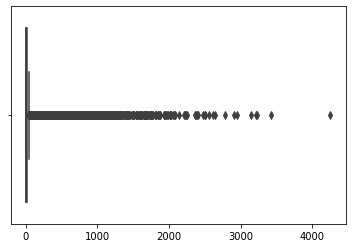

In [16]:
# Printing boxplot
sns.boxplot(x=X)
# Finding the max and min value in dataset
print("Max value: ",X.max().max())
print("Min Value: ",X.min().min())

The numeric values ranges from 0 to 4,254 in which different attributes introduces different ranges. There are 21 attributes contain value between 0 - 1 which accounted for 70%. There are 6 attribures mostly has value less than 100 and the rest comsists of value more than 100. It appears that 4,254 is the largest value in this dataset, this value belongs to the "worst area" variable. It also has the highest mean. Additionally, it also displays on the plot as the outlier. On the other hand, there are 6 variables that have 0 as the smallest value, those are mean concavity, mean concave points, concavity error, concave points error, worst concavity and worst concave points. Both groups of concavity and concave points suggest the smallest value in this dataset.

These features are all engineered from images. I suspect there is some variables with large correlation. Are there largely correlated variables? Why do you think they are largely correlated? Comment on a few.
- Calculate correlation.
- Create a correlation heatmap.
- Comment on largely correlated variables.

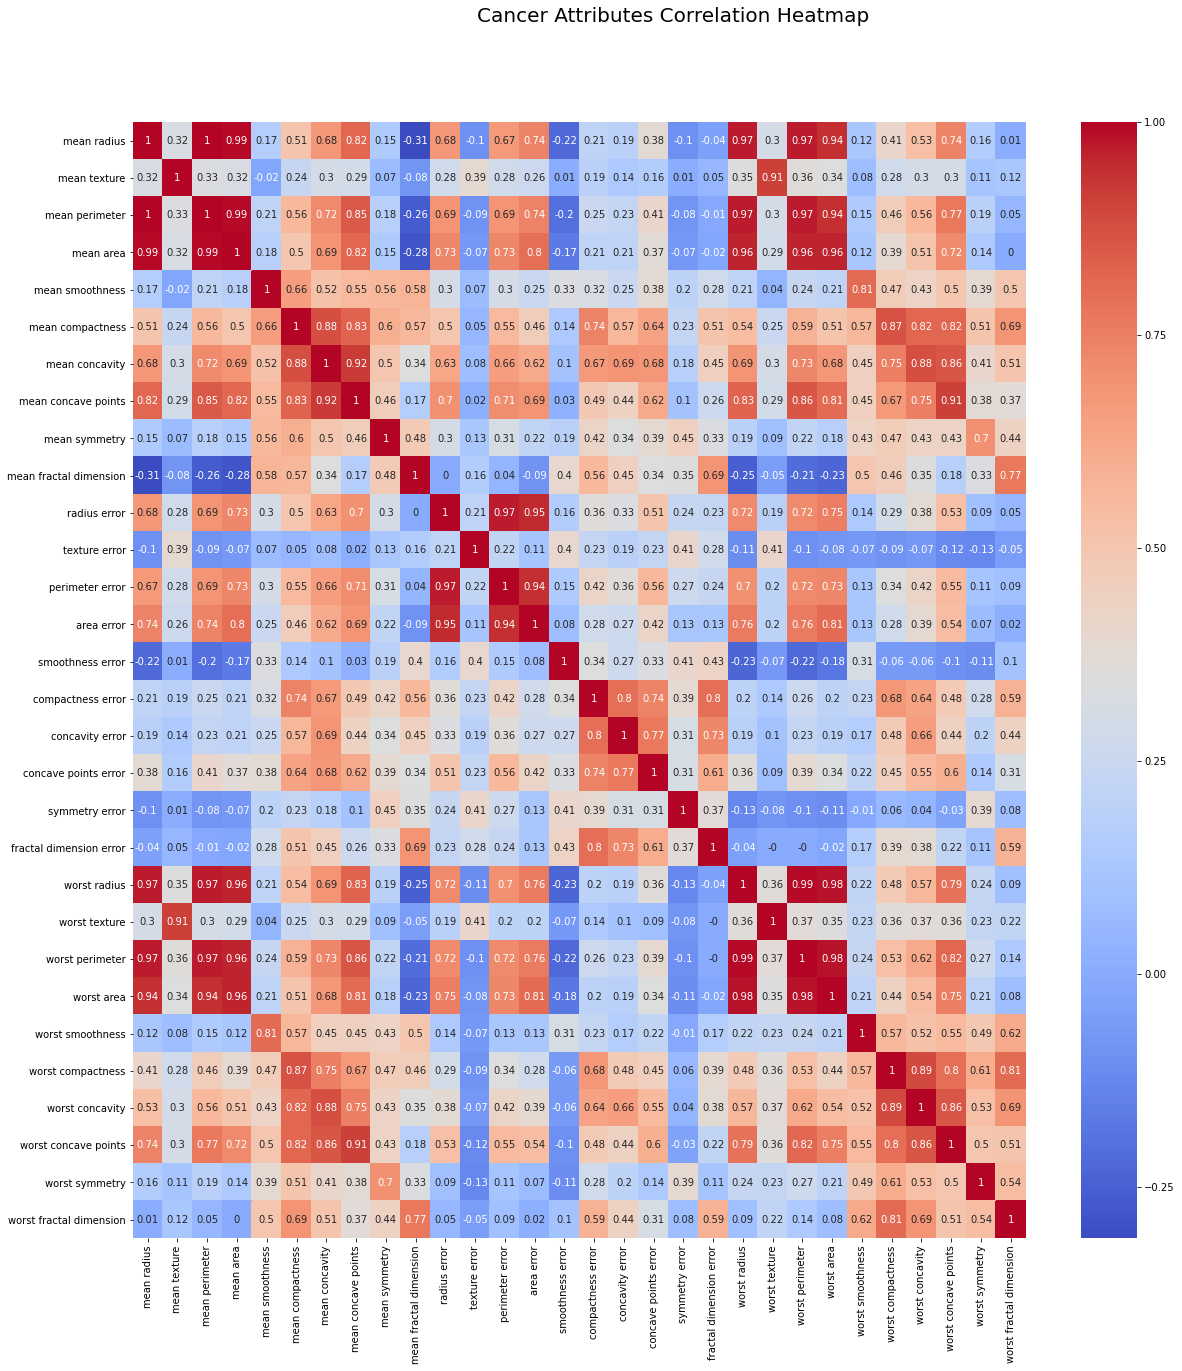

In [17]:
f, ax = plt.subplots(figsize=(20, 20))
corr = X.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm")
f.subplots_adjust(top=0.9)
t= f.suptitle('Cancer Attributes Correlation Heatmap', fontsize=20)

There are largely correlated variables with reference to value >= 0.9 such as a group of radius with a group of  perimeter and a group of area. When cancer is considered by a circle, radius is supposed to define the size of perimeter and area, that results in this high corrrelation. In addition, there are some other high correlations, for example, the mean concave points and the mean concavity. It could be assumed that area with number of concaves relates to the severity of concave portions of the contour.

**Train - Test split** 
- Use sklearn's `tran_test_split()` function to create the split.
- Use `random_state = 55` to create consistent and repeatable train-test splits.

- What is the proportion of cancer classes in train and test sets after splitting? Are they equal or very close to each other?
- What is the importance of stratified sampling?

In [18]:
# split the datasets into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 55, test_size= 0.25)

In [19]:
print("Total cases for train set:", y_train.value_counts().sum())
print(y_train.value_counts())
print("Portion of Malignant in train set = ", round(y_train.value_counts()[1]/y_train.value_counts().sum(), 2))
print("--------------------------------------------------------")
print("Total cases for test set:", y_test.value_counts().sum())
print(y_test.value_counts())
print("Portion of Malignant in test set = ", round(y_test.value_counts()[1]/y_test.value_counts().sum(),2))

Total cases for train set: 426
0    267
1    159
Name: target, dtype: int64
Portion of Malignant in train set =  0.37
--------------------------------------------------------
Total cases for test set: 143
0    90
1    53
Name: target, dtype: int64
Portion of Malignant in test set =  0.37


The portion of cancer classes or malignant type of both train and test sets after spliting is 37% which is equal to each other as shown above.

The importance of stratified sampling is that the test set is created with a population that best represents the entire set and it is supposed to eradicate sampling bias in a test set as well.

- Initiate the logistic regression classifier from the sklearn library as shown below.
- Fit the model
- Make predictions
- Calculate accuracy score. What are the **training** and **testing** accuracies of the model?
- Create confusion matrix
- Either calculate using the confusion matrix, or use the methods in `metrics` to get the following metrics on the testing set:
     - Recall (Sensitivity)
     - Specificity
     - Precision
     - False Positive Rate
     - F1 Score

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
# Initiating the logistic regression
clf = LogisticRegression(max_iter = 10000, solver='lbfgs', penalty='l2', C=0.1)

In [22]:
# Fitting the model
clf.fit(X_train, y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
# Make prediction - Train set
pred = clf.predict(X_train)
# Accuracy Score
metrics.accuracy_score(y_true = y_train, y_pred = pred)

0.9413145539906104

In [24]:
metrics.zero_one_loss(y_train, pred) + metrics.accuracy_score(y_train, pred)

1.0

In [25]:
# Make prediction - Test set
pred = clf.predict(X_test)
# Accuracy Score
metrics.accuracy_score(y_true = y_test, y_pred = pred)

0.986013986013986

In [26]:
metrics.zero_one_loss(y_test, pred) + metrics.accuracy_score(y_test, pred)

1.0

In [27]:
# Creating confusion matrix
# metrics.confusion_matrix(y_test, pred)

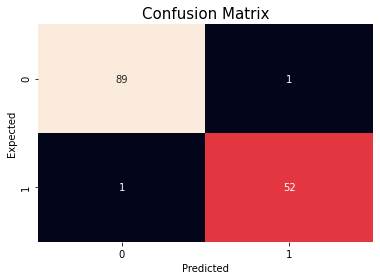

In [28]:
# Creating confusion matrix
confusion_matrix =  pd.crosstab(index=y_test, columns=pred, rownames=['Expected'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=False)
plt.title("Confusion Matrix", fontsize = 15)
plt.show()

In [29]:
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        90
           1       0.98      0.98      0.98        53

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



- Initiate the k-nearest neighbours classifier from the sklearn library with n_neighbors=1. Keep the remaining parameters with their default values. (No need to specify anything)
- Fit the model
- Make predictions
- Calculate accuracy score. What are the **training** and **testing** accuracies of the model?
- Create confusion matrix
- Either calculate using the confusion matrix, or using the methods in `metrics` to get the following metrics on the testing set:
     - Recall (Sensitivity)
     - Specificity
     - Precision
     - F1 Score

In [30]:
from sklearn.neighbors import KNeighborsClassifier

# Initiating the k-nearest neighbours classifier from the sklearn library with n_neighbors=1
KNN = KNeighborsClassifier(n_neighbors=1)      

In [31]:
# Fitting the model
KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [32]:
# Make prediction - Train set
pred_KNN_train = KNN.predict(X_train)
# Accuracy Score
metrics.accuracy_score(y_true = y_train, y_pred = pred_KNN_train)

1.0

In [33]:
# Make prediction - Test set
pred_KNN_test = KNN.predict(X_test)
# Accuracy Score
metrics.accuracy_score(y_true = y_test, y_pred = pred_KNN_test)

0.9440559440559441

In [34]:
metrics.zero_one_loss(y_test, pred_KNN_test) + metrics.accuracy_score(y_test, pred_KNN_test)

1.0

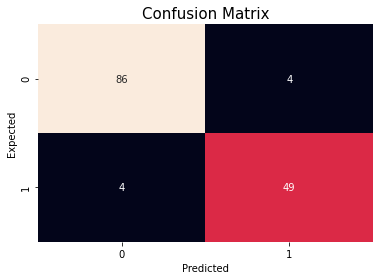

In [35]:
# Creating confusion matrix
confusion_matrix =  pd.crosstab(index=y_test, columns=pred_KNN_test, rownames=['Expected'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=False)
plt.title("Confusion Matrix", fontsize = 15)
plt.show()

In [36]:
print(metrics.classification_report(y_test, pred_KNN_test))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        90
           1       0.92      0.92      0.92        53

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



- Initiate the Gaussian Naive Bayes classifier from the sklearn library. Keep all parameters with their default values. (No need to specify anything)
- Fit the model
- Make predictions
- Calculate accuracy score. What are the **training** and **testing** accuracies of the model?
- Create confusion matrix
- Either calculate using the confusion matrix, or using the methods in `metrics` to get the following metrics on the testing set:
     - Recall (Sensitivity)
     - Specificity
     - Precision
     - F1 Score

In [37]:
# Importing the Gaussian Naive Bayes classifier from the sklearn library
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Classifier
GNB = GaussianNB()

In [38]:
# Fitting the model
GNB.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [39]:
# Make prediction - Train set
pred_GNB_train = GNB.predict(X_train)
# Accuracy Score
metrics.accuracy_score(y_true = y_train, y_pred = pred_GNB_train)

0.9366197183098591

In [40]:
metrics.zero_one_loss(y_train, pred_GNB_train) + metrics.accuracy_score(y_train, pred_GNB_train)

1.0

In [41]:
# Make prediction - Test set
pred_GNB_test = GNB.predict(X_test)
# Accuracy Score
metrics.accuracy_score(y_true = y_test, y_pred = pred_GNB_test)

0.958041958041958

In [42]:
metrics.zero_one_loss(y_test, pred_GNB_test) + metrics.accuracy_score(y_test, pred_GNB_test)

1.0

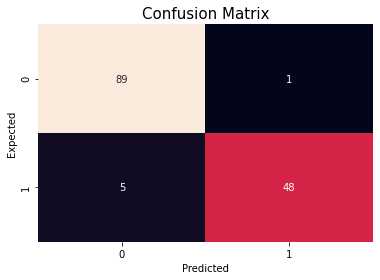

In [43]:
# Creating confusion matrix
confusion_matrix =  pd.crosstab(index=y_test, columns=pred_GNB_test, rownames=['Expected'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=False)
plt.title("Confusion Matrix", fontsize = 15)
plt.show()

In [44]:
print(metrics.classification_report(y_test, pred_GNB_test))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        90
           1       0.98      0.91      0.94        53

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.95       143
weighted avg       0.96      0.96      0.96       143



In logistic regression keeping the other parameters constant try these values for C: `C_list = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2, 10, 50, 100, 200, 500, 1000, 2000, 5000, 10000]`.  
C is the inverse of the regularization parameter $\lambda$. As C increases, the penalty decreases.
- Create a loop and fit the models using each C value. 
- Make predictions
- Calculate accuracy scores for **training** and **testing** datasets. Create a list of accuracy results for train and test accuracies. Show these lists.
- Plot the validation curve based on each C value and the corresponding the train and test accuracies. 
> Create this curve yourself. Do not use sklearn built-in function.

In [45]:
C_list = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2, 10, 50, 100, 200, 500, 1000, 2000, 5000, 10000]
accuracy_train = []
accuracy_test = []
for C in C_list:
    clf = LogisticRegression(max_iter = 10000, solver='lbfgs', penalty='l2', C=C)
    clf.fit(X_train, y_train)
    # Make prediction - Train set
    pred_train = clf.predict(X_train)
    # Accuracy Score
    accuracy_train.append(metrics.accuracy_score(y_true = y_train, y_pred = pred_train))
    # Make prediction - Test set
    pred_test = clf.predict(X_test)
    # Accuracy Score
    accuracy_test.append(metrics.accuracy_score(y_true = y_test, y_pred = pred_test))

In [46]:
print("A list of accuracy results for train set")
for acc in accuracy_train:
    print(acc)

A list of accuracy results for train set
0.9248826291079812
0.931924882629108
0.9413145539906104
0.9342723004694836
0.9389671361502347
0.9413145539906104
0.9413145539906104
0.9460093896713615
0.9460093896713615
0.9507042253521126
0.9624413145539906
0.971830985915493
0.9812206572769953
0.9859154929577465
0.9882629107981221
0.9882629107981221
0.9882629107981221
0.9882629107981221
0.9906103286384976


In [47]:
print("A list of accuracy results for test set")
for acc in accuracy_test:
    print(acc)

A list of accuracy results for test set
0.9370629370629371
0.958041958041958
0.9790209790209791
0.972027972027972
0.972027972027972
0.9790209790209791
0.986013986013986
0.993006993006993
0.993006993006993
0.993006993006993
0.993006993006993
0.986013986013986
0.993006993006993
0.986013986013986
0.986013986013986
0.986013986013986
0.9790209790209791
0.9790209790209791
0.972027972027972


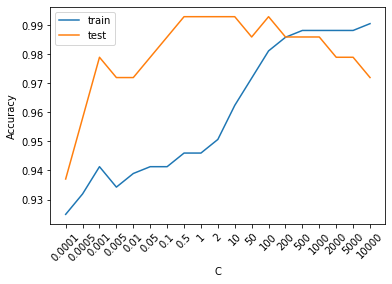

In [48]:
plt.plot(accuracy_train, label = 'train')
plt.plot(accuracy_test, label = 'test')
plt.xticks(np.arange(len(C_list)), C_list, rotation=45)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In K Nearest Neighbors keeping the other parameters constant try these values for K (n_neighbors): `K_list = [1,3,5,7,9,15,19,25,29,35,39,45,49,99]`.  
- Create a loop and fit the models using each K value. 
- Make predictions
- Calculate accuracy scores for **training** and **testing** datasets. Create a list of accuracy results for train and test accuracies. Show these lists.
- Create the validation curve based on each K value and the corresponding the train and test accuracies. 
> Create this curve yourself. Do not use sklearn built-in function.

In [49]:
K_list = [1,3,5,7,9,15,19,25,29,35,39,45,49,99]
accuracy_train = []
accuracy_test = []
for K in K_list:
    clf = KNeighborsClassifier(n_neighbors=K)
    clf.fit(X_train, y_train)
    # Make prediction - Train set
    pred_train = clf.predict(X_train)
    # Accuracy Score
    accuracy_train.append(metrics.accuracy_score(y_true = y_train, y_pred = pred_train))
    # Make prediction - Test set
    pred_test = clf.predict(X_test)
    # Accuracy Score
    accuracy_test.append(metrics.accuracy_score(y_true = y_test, y_pred = pred_test))

In [50]:
print("A list of accuracy results for train set")
for acc in accuracy_train:
    print(acc)

A list of accuracy results for train set
1.0
0.9483568075117371
0.9460093896713615
0.9389671361502347
0.931924882629108
0.9248826291079812
0.9272300469483568
0.9248826291079812
0.9225352112676056
0.9225352112676056
0.9225352112676056
0.9131455399061033
0.9084507042253521
0.9014084507042254


In [51]:
print("A list of accuracy results for test set")
for acc in accuracy_test:
    print(acc)

A list of accuracy results for test set
0.9440559440559441
0.965034965034965
0.9370629370629371
0.9440559440559441
0.9370629370629371
0.9440559440559441
0.9440559440559441
0.9370629370629371
0.9370629370629371
0.9370629370629371
0.9300699300699301
0.9230769230769231
0.9300699300699301
0.9090909090909091


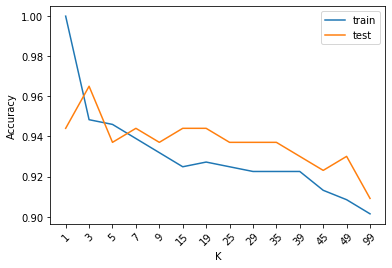

In [52]:
plt.plot(accuracy_train, label = 'train')
plt.plot(accuracy_test, label = 'test')
plt.xticks(np.arange(len(K_list)), K_list, rotation=45)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

- The validation curve for logistic regression seems a bit weird. That might have to do with the fact that the data is not normalized.
- Apply standardization to the data and re-do Quesion 9 and plot the validation curve for logistic regression models with same parameter range for C. 
- Plot the validation curve. What do you see? 
- Which value would you choose for C in logistic regression? Why?

In [53]:
from sklearn import preprocessing

In [54]:
ss = preprocessing.StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

In [55]:
C_list = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2, 10, 50, 100, 200, 500, 1000, 2000, 5000, 10000]
accuracy_train = []
accuracy_test = []
for C in C_list:
    clf = LogisticRegression(max_iter = 10000, solver='lbfgs', penalty='l2', C=C)
    clf.fit(X_train_ss, y_train)
    # Make prediction - Train set
    pred_train = clf.predict(X_train_ss)
    # Accuracy Score
    accuracy_train.append(metrics.accuracy_score(y_true = y_train, y_pred = pred_train))
    # Make prediction - Test set
    pred_test = clf.predict(X_test_ss)
    # Accuracy Score
    accuracy_test.append(metrics.accuracy_score(y_true = y_test, y_pred = pred_test))

In [56]:
print ("C Value   | Train")
print ("-------------------")
for c, acc1 in zip(C_list, accuracy_train):
    #print(round(acc1, 2), "|", round(acc2, 2))
    print ("{:<10}| {:<10}".format(c, round(acc1,5)))

C Value   | Train
-------------------
0.0001    | 0.64554   
0.0005    | 0.83568   
0.001     | 0.88498   
0.005     | 0.94601   
0.01      | 0.94836   
0.05      | 0.97887   
0.1       | 0.98357   
0.5       | 0.99061   
1         | 0.99061   
2         | 0.99296   
10        | 0.99296   
50        | 0.99296   
100       | 0.99296   
200       | 0.99531   
500       | 0.99765   
1000      | 0.99765   
2000      | 1.0       
5000      | 1.0       
10000     | 1.0       


In [58]:
print ("C Value   | Test")
print ("-------------------")
for c, acc2 in zip(C_list, accuracy_test):
    #print(round(acc1, 2), "|", round(acc2, 2))
    print ("{:<10}| {:<10}".format(c, round(acc2,5)))

C Value   | Test
-------------------
0.0001    | 0.63636   
0.0005    | 0.86713   
0.001     | 0.93007   
0.005     | 0.96503   
0.01      | 0.96503   
0.05      | 0.97902   
0.1       | 0.98601   
0.5       | 0.98601   
1         | 0.97902   
2         | 0.97902   
10        | 0.97902   
50        | 0.97203   
100       | 0.97203   
200       | 0.97203   
500       | 0.97203   
1000      | 0.96503   
2000      | 0.96503   
5000      | 0.96503   
10000     | 0.96503   


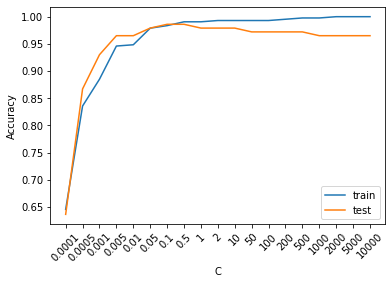

In [59]:
plt.plot(accuracy_train, label = 'train')
plt.plot(accuracy_test, label = 'test')
plt.xticks(np.arange(len(C_list)), C_list, rotation=45)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

From a list of test accuracy, it shows that C = 0.5 provides the highest accuarcy of test set which is 98.6% together with 99% accuracy in train set. At this C = 0.5, it suggests the highest accuracy of test set while the amount greater than 0.5 likely to produce less accuracy in test set.

In [60]:
X_train_ss.shape

(426, 30)

In [61]:
X_train_ss[0:426,:].shape

(426, 30)

- After choosing your best C value, let's check the learning curve.
- Create a logistic regression model of your chosen C value, and the other parameters the same as before.
- Starting from 1 data point in the training set, increase your training set size by 1 point in each iteration, fit the model, get the accuracy scores for both the current training and test sets.
- Increase the training set size consecutively. Do not randomly select data points. (`X_train_ss[0:N,:] where N = {1,2,3,...,len(X_train_ss)}`)
- Plot the learning curve. What do you see? Comment on your finding. 

In [62]:
X_train_ss.shape

(426, 30)

In [63]:
#from sklearn.model_selection import learning_curve

In [64]:
clf = LogisticRegression(max_iter = 10000, solver='lbfgs', penalty='l2', C=0.5)
accuracy_train = []
accuracy_test = []
for N in range(2, len(X_train_ss)):
    #print(N)
    clf.fit(X_train_ss[0:N], y_train[0:N])
    # Make prediction - Train set
    pred_train = clf.predict(X_train_ss[0:N])
    # Accuracy Score
    accuracy_train.append(metrics.accuracy_score(y_true = y_train[0:N], y_pred = pred_train))
    # Make prediction - Test set
    pred_test = clf.predict(X_test_ss)
    # Accuracy Score
    accuracy_test.append(metrics.accuracy_score(y_true = y_test, y_pred = pred_test)) 

In [65]:
print("A list of accuracy results for train set")
for acc in accuracy_train:
    print(acc)

A list of accuracy results for train set
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9814814814814815
0.9818181818181818
0.9821428571428571
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.984375
0.9846153846153847
0.9848484848484849
0.9850746268656716
0.9852941176470589
0.9855072463768116
0.9857142857142858
0.9859154929577465
0.9861111111111112
0.9863013698630136
0.9864864864864865
0.9866666666666667
0.9868421052631579
0.987012987012987
0.9871794871794872
0.9873417721518988
0.9875
0.9876543209876543
0.9878048780487805
0.9879518072289156
0.9880952380952381
0.9882352941176471
0.9883720930232558
0.9885057471264368
0.9886363636363636
0.9887640449438202
0.9888888888888889
0.989010989010989
0.9891304347826086
0.989247311827957
0.9787234042553191
0.9789473684210527
0.9791666666666666
0.979381443298969
0.9795918367346939
0.9797979797979798
0.98
0.9

In [66]:
print("A list of accuracy results for test set")
for acc in accuracy_test:
    print(acc)

A list of accuracy results for test set
0.8181818181818182
0.5664335664335665
0.8461538461538461
0.7972027972027972
0.7972027972027972
0.7832167832167832
0.8741258741258742
0.9230769230769231
0.9230769230769231
0.9230769230769231
0.9300699300699301
0.9300699300699301
0.9440559440559441
0.951048951048951
0.951048951048951
0.958041958041958
0.958041958041958
0.958041958041958
0.958041958041958
0.958041958041958
0.958041958041958
0.965034965034965
0.965034965034965
0.965034965034965
0.965034965034965
0.965034965034965
0.958041958041958
0.958041958041958
0.958041958041958
0.958041958041958
0.958041958041958
0.958041958041958
0.965034965034965
0.965034965034965
0.965034965034965
0.972027972027972
0.972027972027972
0.972027972027972
0.972027972027972
0.972027972027972
0.972027972027972
0.972027972027972
0.972027972027972
0.972027972027972
0.9790209790209791
0.9790209790209791
0.965034965034965
0.965034965034965
0.965034965034965
0.965034965034965
0.965034965034965
0.965034965034965
0.9720279

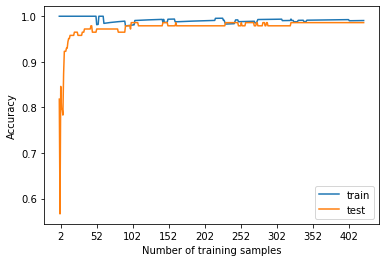

In [67]:
plt.plot(accuracy_train, label = 'train')
plt.plot(accuracy_test, label = 'test')
plt.xticks(np.arange(2, len(X_train_ss), step=50))
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

This plot shows a correlation between a learner's accuracy on a task and the number of training samples required to complete the task; this can be represented as a direct proportion on a plot. The graph showing the rate of progression increases rapidly at the beginning and then reach a plateau over time where the individual is no longer progressing.

- Before applying KNN, it is important to scale the features. 
- Use the standardized train and test sets re-do Quesion 10 and plot the validation curve for KNN models with same parameter range for K. 
- Plot the validation curve. What do you see? 
- Which value would you choose for K in nearest neighbor model?

In [69]:
K_list = [1,3,5,7,9,15,19,25,29,35,39,45,49,99]
accuracy_train = []
accuracy_test = []
for K in K_list:
    clf = KNeighborsClassifier(n_neighbors=K)
    clf.fit(X_train_ss, y_train)
    # Make prediction - Train set
    pred_train = clf.predict(X_train_ss)
    # Accuracy Score
    accuracy_train.append(metrics.accuracy_score(y_true = y_train, y_pred = pred_train))
    # Make prediction - Test set
    pred_test = clf.predict(X_test_ss)
    # Accuracy Score
    accuracy_test.append(metrics.accuracy_score(y_true = y_test, y_pred = pred_test))

In [70]:
print("K         | Accuracy")
print("---------------------")
for k, acc in zip(K_list, accuracy_train):
    print ("{:<10}| {:<10}".format(k, round(acc,5)))

K         | Accuracy
---------------------
1         | 1.0       
3         | 0.98357   
5         | 0.97887   
7         | 0.97183   
9         | 0.97183   
15        | 0.95775   
19        | 0.96009   
25        | 0.95305   
29        | 0.94836   
35        | 0.95305   
39        | 0.95305   
45        | 0.94601   
49        | 0.94836   
99        | 0.92488   


In [71]:
print("K         | Accuracy")
print("---------------------")
for k, acc in zip(K_list, accuracy_test):
    print ("{:<10}| {:<10}".format(k, round(acc,5)))

K         | Accuracy
---------------------
1         | 0.95105   
3         | 0.96503   
5         | 0.97203   
7         | 0.97203   
9         | 0.97902   
15        | 0.97203   
19        | 0.97203   
25        | 0.96503   
29        | 0.96503   
35        | 0.97203   
39        | 0.97203   
45        | 0.97203   
49        | 0.96503   
99        | 0.95105   


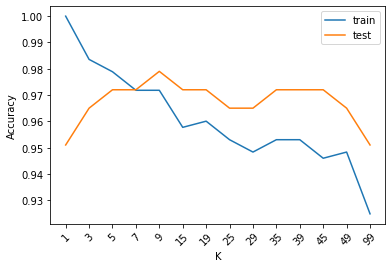

In [72]:
plt.plot(accuracy_train, label = 'train')
plt.plot(accuracy_test, label = 'test')
plt.xticks(np.arange(len(K_list)), K_list, rotation=45)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

With comparison to the validation plot in question 10, it is obvious that the accuracy is improved in this time due to the face that the train and test sets has been standardized before fitting the models. Referring to the plot above, the test line has optimal accuracy at K = 9 while it was K = 3 before completing the standardization in the train and test sets. 

- Using only the classifier models of logistic regression, Gaussian Naive Bayes, or KNN models:
    - Think of other ways of improving the accuracy and list at least two possibilities.
    - Implement one of the methods you proposed. 
    - Is the model accuracy increasing? Why do you think this might have helped?
    - If it not increasing, try the other method you proposed. Why do you think this might have helped?
    - If none of them did not improve, comment on why this might have been the case.
    - If you have time try a few more solutions and see which one works. 

There are multiple ways in order to improve the accuracy of machine learning models. Three fundamental ways are as follows:

(1) Feeding with more training data: meaning that we are providing more information to the machine learning algorithms to understand the varieties and correlate the same before returning the right answer.

(2) Feature Engineering such as transformation: it is believed to have a higher ability to explain the variance in the training data

(3) Ensemble method: the idea is that the combined knowledge of these models will give a more accurate final result than the knowledge of any single one of them.

### Logistic Regression

In [73]:
# Increasing the size of train set from 50% to 80%
# LogisticRegression
TestSize = [0.5, 0.4, 0.3, 0.2]
acc = []
for s in TestSize:
    X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, stratify=y, random_state = 55, test_size= s)
    clf = LogisticRegression(max_iter = 10000, solver='lbfgs', penalty='l2', C=0.1)
    # Fitting the model
    clf.fit(X_train2, y_train2)
    # Make prediction - Test set
    pred = clf.predict(X_test2)
    # Accuracy Score
    acc.append(metrics.accuracy_score(y_true = y_test2, y_pred = pred))
    
train = [0.5, 0.6, 0.7, 0.8]
print("Train size| Accuracy")
print("-----------------------")
for i, j in zip(train, acc):
    print ("{:<10}| {:<10}".format(i, round(j,5)))

Train size| Accuracy
-----------------------
0.5       | 0.95088   
0.6       | 0.97368   
0.7       | 0.9883    
0.8       | 0.97368   


In [74]:
# Training size increasing with Feature transformation
# LogisticRegression
TestSize = [0.5, 0.4, 0.3, 0.2]
acc = []
for s in TestSize:
    X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, stratify=y, random_state = 55, test_size= s)
    clf = LogisticRegression(max_iter = 10000, solver='lbfgs', penalty='l2', C=0.1)
    
    # preprocessing
    ss = preprocessing.StandardScaler()
    X_train_ss = ss.fit_transform(X_train2)
    X_test_ss = ss.transform(X_test2)
    
    # Fitting the model
    clf.fit(X_train_ss, y_train2)
    # Make prediction - Test set
    pred = clf.predict(X_test_ss)
    # Accuracy Score
    acc.append(metrics.accuracy_score(y_true = y_test2, y_pred = pred))
    
train = [0.5, 0.6, 0.7, 0.8]
print("Train size| Accuracy")
print("-----------------------")
for i, j in zip(train, acc):
    print ("{:<10}| {:<10}".format(i, round(j,5)))

Train size| Accuracy
-----------------------
0.5       | 0.98596   
0.6       | 0.99123   
0.7       | 0.9883    
0.8       | 0.98246   


In this logistic model, I tried to vary the size of training - testing sets from 50% to 80%. The first trial without data transformation shows that when the training set has been fed with more data, the accuracy tends to increase.

Second experiment, I tried dataset with different training size together with feature transformation. When compared side by side with the first experiemnt, it could be seen that the accuracy also increase by this method with the same training size. 

### GaussiansNB

In [75]:
# Increasing the size of train set from 50% to 90%
# GaussianNB
TestSize = [0.5, 0.4, 0.3, 0.2]
acc = []
for s in TestSize:
    X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, stratify=y, random_state = 55, test_size= s)
    GNB = GaussianNB()
    # Fitting the model
    GNB.fit(X_train2, y_train2)
    # Make prediction - Test set
    pred_GNB_test = GNB.predict(X_test2)
    # Accuracy Score
    acc.append(metrics.accuracy_score(y_true = y_test2, y_pred = pred_GNB_test))
    
train = [0.5, 0.6, 0.7, 0.8]
print("Train size | Accuracy")
for i, j in zip(train, acc):
    print ("{:<10}| {:<10}".format(i, round(j,5)))

Train size | Accuracy
0.5       | 0.93684   
0.6       | 0.95175   
0.7       | 0.94737   
0.8       | 0.95614   


In [76]:
# Training size increasing with Feature transformation
# GaussianNB
TestSize = [0.5, 0.4, 0.3, 0.2]
acc = []
for s in TestSize:
    X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, stratify=y, random_state = 55, test_size= s)
    clf = GaussianNB()
    # preprocessing
    ss = preprocessing.StandardScaler()
    X_train_ss = ss.fit_transform(X_train2)
    X_test_ss = ss.transform(X_test2)
    
    # Fitting the model
    clf.fit(X_train_ss, y_train2)
    # Make prediction - Test set
    pred = clf.predict(X_test_ss)
    # Accuracy Score
    acc.append(metrics.accuracy_score(y_true = y_test2, y_pred = pred))
    
train = [0.5, 0.6, 0.7, 0.8]
print("Train size| Accuracy")
print("-----------------------")
for i, j in zip(train, acc):
    print ("{:<10}| {:<10}".format(i, round(j,5)))

Train size| Accuracy
-----------------------
0.5       | 0.92281   
0.6       | 0.9386    
0.7       | 0.93567   
0.8       | 0.9386    


For Gaussian Naive Bayes, this model does not show much difference of accuracy when varying the size of training set as this method is not affected by the curse of dimensionality and large feature sets. When the transformation is applied to various training size of training set, it also displays minimal to none difference. 

In addition, Naive Bayes offers two hyperparameters to tune for smoothing: alpha and beta. A hyperparameter is a prior parameter that are tuned on the training set to optimize it. Moreover, this model can be fooled by the correlated variables that were shown and identified earlier. Hence, this two proposed methods might not significantly improve the model. 

### KNN

In [77]:
# Increasing the size of train set from 50% to 90%
# KNeighborsClassifier
TestSize = [0.5, 0.4, 0.3, 0.2]
acc = []
for s in TestSize:
    X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, stratify=y, random_state = 55, test_size= s)
    clf = KNeighborsClassifier(n_neighbors=9)
    clf.fit(X_train2, y_train2)
    # Make prediction - Test set
    pred_test = clf.predict(X_test2)
    # Accuracy Score
    acc.append(metrics.accuracy_score(y_true = y_test2, y_pred = pred_test))
    
train = [0.5, 0.6, 0.7, 0.8]
print("Train size | Accuracy")
for i, j in zip(train, acc):
    print ("{:<10}| {:<10}".format(i, round(j,5)))

Train size | Accuracy
0.5       | 0.92982   
0.6       | 0.94298   
0.7       | 0.94152   
0.8       | 0.92982   


In [78]:
# Training size increasing with Feature transformation
# KNeighborsClassifier
TestSize = [0.5, 0.4, 0.3, 0.2]
acc = []
for s in TestSize:
    X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, stratify=y, random_state = 55, test_size= s)
    clf = KNeighborsClassifier(n_neighbors=9)
    # preprocessing
    ss = preprocessing.StandardScaler()
    X_train_ss = ss.fit_transform(X_train2)
    X_test_ss = ss.transform(X_test2)
    
    # Fitting the model
    clf.fit(X_train_ss, y_train2)
    # Make prediction - Test set
    pred = clf.predict(X_test_ss)
    # Accuracy Score
    acc.append(metrics.accuracy_score(y_true = y_test2, y_pred = pred))
    
train = [0.5, 0.6, 0.7, 0.8]
print("Train size| Accuracy")
print("-----------------------")
for i, j in zip(train, acc):
    print ("{:<10}| {:<10}".format(i, round(j,5)))

Train size| Accuracy
-----------------------
0.5       | 0.97895   
0.6       | 0.98684   
0.7       | 0.97661   
0.8       | 0.97368   


For this KNN model, when varying the size of training set in the first experiemnt, the accuracy get a little bit improved then level off, it goes up using size 50% to 70% then come down a little bit when using more than 80%. 

On the other hand, the accuracy stays quite stable across second experiemnt when the transformation is applied. Compared between first and second experiemnt, the accuracy are increased when using transformation processes. This is due to the fact that KNN works by finding the distances between a query and all the examples in the data, selecting the specified number examples (K=9) closest to the query, then votes for the most frequent label. 